In [1]:
import ROOT
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib import pylab
import unicodedata

Welcome to JupyROOT 6.20/04


In [2]:
# read in data
inFile1 = ROOT . TFile . Open ( "ttH_mc16a_mc16d_me16e_merge.root" , " READ " )
tree1 = inFile1 . Get ( "ttHyyTree" )

inFile2 = ROOT . TFile . Open ( "ttgammgamma_mc16a_mc16d_mc16e_merge.root" , " READ " )
tree2 = inFile2 . Get ( "ttHyyTree" )

ReadStreamerInfo, class:string, illegal uid=-2
ReadStreamerInfo, class:string, illegal uid=-2


Warning in <TClass::Init>: no dictionary for class xAOD::EventFormat_v1 is available
Warning in <TClass::Init>: no dictionary for class xAOD::AuxInfoBase is available
Warning in <TClass::Init>: no dictionary for class SG::IAuxStore is available
Warning in <TClass::Init>: no dictionary for class SG::IConstAuxStore is available
Warning in <TClass::Init>: no dictionary for class SG::IAuxStoreIO is available
Warning in <TClass::Init>: no dictionary for class SG::IAuxStoreHolder is available
Warning in <TClass::Init>: no dictionary for class SG::AuxElement is available
Warning in <TClass::Init>: no dictionary for class SG::IAuxElement is available
Warning in <TClass::Init>: no dictionary for class xAOD::FileMetaData_v1 is available
Warning in <TClass::Init>: no dictionary for class xAOD::FileMetaDataAuxInfo_v1 is available


In [3]:
# ttHyy variables
t1 = []
t2 = []
w1 = []
w2 = []
h = []
tth = []
tt = []
t = []
thetah = []
thetat = []
phitstar = []
thetaw = []
phiw = []
thetab = []
phib = []
thetaf = []
phif = []

In [4]:
# ttyy variables: sideband
t1s = []
t2s = []
w1s = []
w2s = []
hs = []
tths = []
tts = []
ts = []
thetahs = []
thetats = []
phitstars = []
thetaws = []
phiws = []
thetabs = []
phibs = []
thetafs = []
phifs = []

In [5]:
# ttHyy variables: near higgs region
t1n = []
t2n = []
w1n = []
w2n = []
hn = []
tthn = []
ttn = []
tn = []
thetahn = []
thetatn = []
phitstarn = []
thetawn = []
phiwn = []
thetabn = []
phibn = []
thetafn = []
phifn = []

In [6]:
# cos of 2 vectors
def angle (v1, v2):
  dot = v1[0]*v2[0] + v1[1]*v2[1] + v1[2]*v2[2]
  m1 = np.sqrt(v1[0]**2 + v1[1]**2 + v1[2]**2)
  m2 = np.sqrt(v2[0]**2 + v2[1]**2 + v2[2]**2)
  return dot/(m1*m2)

# cross production of 2 vectors
def cross (v1,v2):
  c1 = v1[1]*v2[2] - v2[1]*v1[2]
  c2 = v1[2]*v2[0] - v1[0]*v2[2]
  c3 = v1[0]*v2[1] - v2[0]*v1[1]
  return [c1,c2,c3]

In [7]:
# Signal analysis
for entryNum1 in range (0 , tree1 . GetEntries ()):
  # read
  tree1 . GetEntry ( entryNum1 )

  # Event selection: 4jets, 2bjets, 1lepton
  btag = 0
    
  # 4jets
  if len(getattr(tree1, "jet_btag85")) != 4:
    continue
    
  # 2bjets
  for i in getattr ( tree1 , "jet_btag85" ):
    if i:
      btag = btag + 1
  if btag != 2:
    continue

  # 1lepton
  if (getattr ( tree1 , "n_lep" )) != 1:
    continue

  # Lorentz vectors
  # lepton
  lepton = ROOT . TLorentzVector ()

  if getattr ( tree1 , "n_el" ) == 1 and getattr ( tree1 , "n_mu" ) == 0:
    lpt = getattr ( tree1 , "el_pt" )
    leta = getattr ( tree1 , "el_eta" )
    lphi = getattr ( tree1 , "el_phi" )
    lm = 0.000511 # electron mass


  if getattr ( tree1 , "n_mu" ) == 1 and getattr ( tree1 , "n_el" ) == 0:
    lpt = getattr ( tree1 , "mu_pt" )
    leta = getattr ( tree1 , "mu_eta" )
    lphi = getattr ( tree1 , "mu_phi" )
    lm = 0.10566 # muon mass

  lepton . SetPtEtaPhiM ( lpt[0] , leta[0] , lphi[0] , lm) 

  # jets
  q1 = ROOT . TLorentzVector ()
  q2 = ROOT . TLorentzVector ()
  b1 = ROOT . TLorentzVector ()
  b2 = ROOT . TLorentzVector ()

  jpt = getattr ( tree1 , "jet_pt" )
  jeta = getattr ( tree1 , "jet_eta" )
  jphi = getattr ( tree1 , "jet_phi" )
  jE = getattr ( tree1 , "jet_E" )    
  isb = getattr ( tree1 , "jet_btag85" )

  if isb[0]:
    b1 . SetPtEtaPhiE (jpt[0] , jeta[0] , jphi[0] , jE[0])
    if isb[1]:
      b2 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
      q1 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
      q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
    else:
      q1 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
      if isb[2]:
        b2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
      else:
        q2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])

  else:
    q1 . SetPtEtaPhiE (jpt[0] , jeta[0] , jphi[0] , jE[0])
    if isb[1]:
      b1 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
      if isb[2]:
        b2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
      else:
        q2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
        
    else:
      q2 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
      b1 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
      b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])

    
  # neutrino
  nu = ROOT . TLorentzVector ()
  npx = - getattr ( tree1 , "met_x" )
  npy = - getattr ( tree1 , "met_y" )

  # neutrino Pz: assume m_w = 80.379 GeV
    
  A = 2 * lepton.Pz()
  B = -2 * lepton.E()
  C = npx**2+npy**2
  D = lepton.M()**2 - 80.379**2 - 2*lepton.Px()*npx - 2*lepton.Py()*npy
  E = A*A*D*D - (A**2-B**2)*(D**2-B*B*C)

  if E<0:
    E = 0
    
  npz = (A*D + np.sqrt(E))/(A**2 - B**2)

  nE = np.sqrt(npx**2+npy**2+npz**2)
  nu . SetPxPyPzE ( npx , npy , npz , nE)

  # photon
  y0 = ROOT . TLorentzVector ()
  y1 = ROOT . TLorentzVector ()

  # y0
  pt0 = getattr ( tree1 , "y1_pt" )
  eta0 = getattr ( tree1 , "y1_eta" )
  phi0 = getattr ( tree1 , "y1_phi" )
  nrg0 = getattr ( tree1 , "y1_E" )
  y0 . SetPtEtaPhiE ( pt0 , eta0 , phi0 , nrg0)

  # y1
  pt1 = getattr ( tree1 , "y2_pt" )
  eta1 = getattr ( tree1 , "y2_eta" )
  phi1 = getattr ( tree1 , "y2_phi" )
  nrg1 = getattr ( tree1 , "y2_E" )
  y1 . SetPtEtaPhiE ( pt1 , eta1 , phi1 , nrg1)

  # Higgs mass
  higgs = y0 + y1
  higgsMass = higgs . M ()

  # W mass
  wlv = lepton + nu     # w1
  w1m = wlv.M()

  wqq = q1 + q2      # w2
  w2m = wqq.M()

  # Top mass
  w1b1 = (wlv + b1).M()
  w2b2 = (wqq + b2).M()

  w1b2 = (wlv + b2).M()
  w2b1 = (wqq + b1).M()

  chi1 = (w1b1 - 173)**2 + (w2b2 - 173)**2
  chi2 = (w1b2 - 173)**2 + (w2b1 - 173)**2

  if chi1 <= chi2:
    tlvb = w1b1
    tv1 = wlv + b1
    
    tqqb = w2b2
    tv2 = wqq + b2

  else:
    tlvb = w1b2
    tv1 = wlv + b2
    
    tqqb = w2b1
    tv2 = wqq + b1
  
  #### 1 ####
  # ttH mass
  tthm = (lepton + nu + b1 + b2 + q1 + q2 + y0 + y1).M()

  #### 2 ####
  # tt mass
  ttv = lepton + nu + b1 + b2 + q1 + q2
  ttm = (lepton + nu + b1 + b2 + q1 + q2).M()

  #### 3 ####
  # top mass, done before  
    
  #### 4 ####
  # cos(θ_H): angle between the H boson direction and the incoming partons in the ttH frame
  H_d = ROOT.TVector3()
  H_d.SetXYZ(higgs.Px(), higgs.Py(), higgs.Pz())
  beam_d = ROOT.TVector3()
  beam_d.SetXYZ(0,0,1)
  theta_H = np.cos(H_d.Angle(beam_d))
  
  #### 5 ####
  # cos(θ_t): angle between the top quark direction and the opposite Higgs direction in the tt frame
  # Boost vector
  tt_b = ttv.BoostVector()
    
  # Boost Top and Higgs vector
  tv1.Boost(-tt_b)
  tv2.Boost(-tt_b)
  higgs.Boost(-tt_b)

  # Directions in tt frame
  H_ttd = ROOT.TVector3()
  t1_ttd = ROOT.TVector3()
  t2_ttd = ROOT.TVector3()
    
  H_ttd.SetXYZ(-higgs.Px(), -higgs.Py(), -higgs.Pz())
  t1_ttd.SetXYZ(tv1.Px(), tv1.Py(), tv1.Pz())
  t2_ttd.SetXYZ(tv2.Px(), tv2.Py(), tv2.Pz())
  theta_t1 = np.cos(H_ttd.Angle(t1_ttd))
  theta_t2 = np.cos(H_ttd.Angle(t2_ttd))

  # Return to lab frame
  tv1.Boost(tt_b)
  tv2.Boost(tt_b)
  higgs.Boost(tt_b)

  #### 6 ####
  # Φ*t: angle between the decay planes of the tt system and H → VV in the ttH frame
  H_ld = [higgs.Px(), higgs.Py(), higgs.Pz()]
  y0_ld = [y0.Px(), y0.Py(), y0.Pz()]
  y1_ld = [y1.Px(), y1.Py(), y1.Pz()]
  t1_ld = [tv1.Px(), tv1.Py(), tv1.Pz()]
  t2_ld = [tv2.Px(), tv2.Py(), tv2.Pz()]
  plane_tt = cross(t1_ld, t2_ld)
  plane_Hyy = cross(y0_ld, y1_ld)
  phit = np.arccos(angle(plane_tt, plane_Hyy))

  #### 7 ####
  # cos(θ_W) : angle between W+ and opposite of the bb̄ system in the W+ W− frame
  # Boost vector
  ww = wlv + wqq
  bb = b1 + b2
  ww_b = ww.BoostVector()

  # Boost W and bb vector
  wlv.Boost(-ww_b)
  wqq.Boost(-ww_b)
  bb.Boost(-ww_b)

  # Directions in WW frame
  bb_wwd = ROOT.TVector3()
  w1_wwd = ROOT.TVector3()
  w2_wwd = ROOT.TVector3()
    
  bb_wwd.SetXYZ(-bb.Px(), -bb.Py(), -bb.Pz())
  w1_wwd.SetXYZ(wlv.Px(), wlv.Py(), wlv.Pz())
  w2_wwd.SetXYZ(wqq.Px(), wqq.Py(), wqq.Pz())

  theta_w1 = np.cos(w1_wwd.Angle(bb_wwd))
  theta_w2 = np.cos(w2_wwd.Angle(bb_wwd))

  # Return to lab frame
  wlv.Boost(ww_b)
  wqq.Boost(ww_b)
  bb.Boost(ww_b)

  #### 8 ####
  # Φw: angle between the production (bb̄)(W+W−)H plane and the plane of the W+W− system in the tt frame
  # Boost
  bb.Boost(-tt_b)
  higgs.Boost(-tt_b)
  wlv.Boost(-tt_b)
  wqq.Boost(-tt_b)

  # Cross product
  bb_ttd = [bb.Px(), bb.Py(), bb.Pz()]
  h_ttd = [higgs.Px(), higgs.Py(), higgs.Pz()]
  w1_ttd = [wlv.Px(), wlv.Py(), wlv.Pz()]
  w2_ttd = [wqq.Px(), wqq.Py(), wqq.Pz()]

  plane_bbwwh = cross(bb_ttd, h_ttd)
  plane_ww = cross(w1_ttd, w2_ttd)
  phi_w = np.arccos(angle(plane_bbwwh, plane_ww))

  # Return to lab frame
  bb.Boost(tt_b)
  higgs.Boost(tt_b)
  wlv.Boost(tt_b)
  wqq.Boost(tt_b)

  #### 9 ####
  # cos(θ_b): angle between the b quark and opposite of the W + W − system in the bb̄ frame
  # Boost vector
  bb_b = bb.BoostVector()

  # Boost b and ww vector
  b1.Boost(-bb_b)
  b2.Boost(-bb_b)
  ww.Boost(-bb_b)

  # Directions in bb frame
  ww_bbd = ROOT.TVector3()
  b1_bbd = ROOT.TVector3()
  b2_bbd = ROOT.TVector3()
    
  ww_bbd.SetXYZ(-ww.Px(), -ww.Py(), -ww.Pz())
  b1_bbd.SetXYZ(b1.Px(), b1.Py(), b1.Pz())
  b2_bbd.SetXYZ(b2.Px(), b2.Py(), b2.Pz())
  theta_b1 = np.cos(ww_bbd.Angle(b1_bbd))
  theta_b2 = np.cos(ww_bbd.Angle(b2_bbd))

  # Return to lab frame
  b1.Boost(bb_b)
  b2.Boost(bb_b)
  ww.Boost(bb_b)

  #### 10 ####
  # Φb: angle between the planes of the bb and W+W− systems in the tt frame
  # Boost 
  b1.Boost(-tt_b)
  b2.Boost(-tt_b)

  # Cross product (w1w2 plane in tt frame already done in phi_w)
  b1_ttd = [b1.Px(), b1.Py(), b1.Pz()]
  b2_ttd = [b2.Px(), b2.Py(), b2.Pz()]
  plane_b1b2 = cross(b1_ttd, b2_ttd)
  phi_b = np.arccos(angle(plane_b1b2, plane_ww))

  # Return to lab frame
  b1.Boost(tt_b)
  b2.Boost(tt_b)

  #### 11 ####
  # cos(θ_f): angles between fermion direction and opposite of the b or b quark in the W+ or W− frame
  # Boost vector
  wlv_b = wlv.BoostVector()
    
  # Boost lepton, b1 and b2 vector
  lepton.Boost(-wlv_b)
  b1.Boost(-wlv_b)
  b2.Boost(-wlv_b)

  # Directions in w frame
  l_wd = ROOT.TVector3()
  b1_wd = ROOT.TVector3()
  b2_wd = ROOT.TVector3()
    
  l_wd.SetXYZ(lepton.Px(), lepton.Py(), lepton.Pz())
  b1_wd.SetXYZ(-b1.Px(), -b1.Py(), -b1.Pz())
  b2_wd.SetXYZ(-b2.Px(), -b2.Py(), -b2.Pz())

  if chi1 <= chi2:
    theta_f = np.cos(l_wd.Angle(b1_wd))
  else:
    theta_f = np.cos(l_wd.Angle(b2_wd))

  # Return to lab frame
  lepton.Boost(wlv_b)
  b1.Boost(wlv_b)
  b2.Boost(wlv_b)

  #### 12 ####
  # Φf: angle between the W+ or W− decay plane and the t-W+b or tW−b̄ plane in the t or t̄ quark frame
  # Boost vector
  tv1_b = tv1.BoostVector()

  # Boost lepton, neutrino, b1 and b2 vector
  lepton.Boost(-tv1_b)
  nu.Boost(-tv1_b)
  b1.Boost(-tv1_b)
  b2.Boost(-tv1_b)
  tv2.Boost(-tv1_b)

  # Cross product
  l_td = [lepton.Px(), lepton.Py(), lepton.Pz()]
  nu_td = [nu.Px(), nu.Py(), nu.Pz()]
  b1_td = [b1.Px(), b1.Py(), b1.Pz()]
  b2_td = [b2.Px(), b2.Py(), b2.Pz()]
  t2_td = [tv2.Px(), tv2.Py(), tv2.Pz()]

  plane_wwt = cross(l_td, nu)

  if chi1 <= chi2:
    plane_tlvb = cross(b1_td, t2_td)
  else:
    plane_tlvb = cross(b2_td, t2_td)

  phi_f = np.arccos(angle(plane_tlvb, plane_wwt))

  # Return to lab frame
  lepton.Boost(tv1_b)
  nu.Boost(tv1_b)
  b1.Boost(tv1_b)
  b2.Boost(tv1_b)
  tv2.Boost(tv1_b)

  # Fill the hist
  w1 . append ( w1m )
  w2 . append ( w2m )
  t1 . append ( tlvb )
  t2 . append ( tqqb )
  h . append ( higgsMass )
  tth . append ( tthm )
  tt . append ( ttm )
  t . append (tlvb)
  t . append (tqqb)
  thetah . append (theta_H)
  thetat . append (theta_t1)
  thetat . append (theta_t2)
  phitstar . append (phit)
  thetaw . append (theta_w1)
  thetaw . append (theta_w2)
  phiw . append (phi_w)
  thetab . append (theta_b1)
  thetab . append (theta_b2)
  phib . append (phi_b)
  thetaf . append (theta_f)
  phif . append (phi_f)

In [8]:
# Background analysis
for entryNum2 in range (0 , tree2 . GetEntries ()):
  # read
  tree2 . GetEntry ( entryNum2 )

  # Event selection: 4jets, 2bjets, 1lepton
  btag = 0
    
  # 4jets
  if len(getattr(tree2, "jet_btag85")) != 4:
    continue
    
  # 2bjets
  for i in getattr ( tree2 , "jet_btag85" ):
    if i:
      btag = btag + 1
  if btag != 2:
    continue

  # 1lepton
  if (getattr ( tree2 , "n_lep" )) != 1:
    continue

  # Lorentz vectors
  # lepton
  lepton = ROOT . TLorentzVector ()

  if getattr ( tree2 , "n_el" ) == 1 and getattr ( tree2 , "n_mu" ) == 0:
    lpt = getattr ( tree2 , "el_pt" )
    leta = getattr ( tree2 , "el_eta" )
    lphi = getattr ( tree2 , "el_phi" )
    lm = 0.000511 # electron mass


  if getattr ( tree2 , "n_mu" ) == 1 and getattr ( tree2 , "n_el" ) == 0:
    lpt = getattr ( tree2 , "mu_pt" )
    leta = getattr ( tree2 , "mu_eta" )
    lphi = getattr ( tree2 , "mu_phi" )
    lm = 0.10566 # muon mass

  lepton . SetPtEtaPhiM ( lpt[0] , leta[0] , lphi[0] , lm) 

  # jets
  q1 = ROOT . TLorentzVector ()
  q2 = ROOT . TLorentzVector ()
  b1 = ROOT . TLorentzVector ()
  b2 = ROOT . TLorentzVector ()

  jpt = getattr ( tree2 , "jet_pt" )
  jeta = getattr ( tree2 , "jet_eta" )
  jphi = getattr ( tree2 , "jet_phi" )
  jE = getattr ( tree2 , "jet_E" )    
  isb = getattr ( tree2 , "jet_btag85" )

  if isb[0]:
    b1 . SetPtEtaPhiE (jpt[0] , jeta[0] , jphi[0] , jE[0])
    if isb[1]:
      b2 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
      q1 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
      q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
    else:
      q1 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
      if isb[2]:
        b2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
      else:
        q2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])

  else:
    q1 . SetPtEtaPhiE (jpt[0] , jeta[0] , jphi[0] , jE[0])
    if isb[1]:
      b1 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
      if isb[2]:
        b2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
      else:
        q2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
        
    else:
      q2 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
      b1 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
      b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])

    
  # neutrino
  nu = ROOT . TLorentzVector ()
  npx = - getattr ( tree2 , "met_x" )
  npy = - getattr ( tree2 , "met_y" )

  # neutrino Pz: assume m_w = 80.379 GeV
    
  A = 2 * lepton.Pz()
  B = -2 * lepton.E()
  C = npx**2+npy**2
  D = lepton.M()**2 - 80.379**2 - 2*lepton.Px()*npx - 2*lepton.Py()*npy
  E = A*A*D*D - (A**2-B**2)*(D**2-B*B*C)

  if E<0:
    E = 0
    
  npz = (A*D + np.sqrt(E))/(A**2 - B**2)

  nE = np.sqrt(npx**2+npy**2+npz**2)
  nu . SetPxPyPzE ( npx , npy , npz , nE)

  # photon
  y0 = ROOT . TLorentzVector ()
  y1 = ROOT . TLorentzVector ()

  # y0
  pt0 = getattr ( tree2 , "y1_pt" )
  eta0 = getattr ( tree2 , "y1_eta" )
  phi0 = getattr ( tree2 , "y1_phi" )
  nrg0 = getattr ( tree2 , "y1_E" )
  y0 . SetPtEtaPhiE ( pt0 , eta0 , phi0 , nrg0)

  # y1
  pt1 = getattr ( tree2 , "y2_pt" )
  eta1 = getattr ( tree2 , "y2_eta" )
  phi1 = getattr ( tree2 , "y2_phi" )
  nrg1 = getattr ( tree2 , "y2_E" )
  y1 . SetPtEtaPhiE ( pt1 , eta1 , phi1 , nrg1)

  # Higgs mass
  higgs = y0 + y1
  higgsMass = higgs . M ()

  # W mass
  wlv = lepton + nu     # w1
  w1m = wlv.M()

  wqq = q1 + q2      # w2
  w2m = wqq.M()

  # Top mass
  w1b1 = (wlv + b1).M()
  w2b2 = (wqq + b2).M()

  w1b2 = (wlv + b2).M()
  w2b1 = (wqq + b1).M()

  chi1 = (w1b1 - 173)**2 + (w2b2 - 173)**2
  chi2 = (w1b2 - 173)**2 + (w2b1 - 173)**2

  if chi1 <= chi2:
    tlvb = w1b1
    tv1 = wlv + b1
    
    tqqb = w2b2
    tv2 = wqq + b2

  else:
    tlvb = w1b2
    tv1 = wlv + b2
    
    tqqb = w2b1
    tv2 = wqq + b1
  
  #### 1 ####
  # ttH mass
  tthm = (lepton + nu + b1 + b2 + q1 + q2 + y0 + y1).M()

  #### 2 ####
  # tt mass
  ttv = lepton + nu + b1 + b2 + q1 + q2
  ttm = (lepton + nu + b1 + b2 + q1 + q2).M()

  #### 3 ####
  # top mass, done before  
    
  #### 4 ####
  # cos(θ_H): angle between the H boson direction and the incoming partons in the ttH frame
  H_d = ROOT.TVector3()
  H_d.SetXYZ(higgs.Px(), higgs.Py(), higgs.Pz())
  beam_d = ROOT.TVector3()
  beam_d.SetXYZ(0,0,1)
  theta_H = np.cos(H_d.Angle(beam_d))
  
  #### 5 ####
  # cos(θ_t): angle between the top quark direction and the opposite Higgs direction in the tt frame
  # Boost vector
  tt_b = ttv.BoostVector()
    
  # Boost Top and Higgs vector
  tv1.Boost(-tt_b)
  tv2.Boost(-tt_b)
  higgs.Boost(-tt_b)

  # Directions in tt frame
  H_ttd = ROOT.TVector3()
  t1_ttd = ROOT.TVector3()
  t2_ttd = ROOT.TVector3()
    
  H_ttd.SetXYZ(-higgs.Px(), -higgs.Py(), -higgs.Pz())
  t1_ttd.SetXYZ(tv1.Px(), tv1.Py(), tv1.Pz())
  t2_ttd.SetXYZ(tv2.Px(), tv2.Py(), tv2.Pz())
  theta_t1 = np.cos(H_ttd.Angle(t1_ttd))
  theta_t2 = np.cos(H_ttd.Angle(t2_ttd))

  # Return to lab frame
  tv1.Boost(tt_b)
  tv2.Boost(tt_b)
  higgs.Boost(tt_b)

  #### 6 ####
  # Φ*t: angle between the decay planes of the tt system and H → VV in the ttH frame
  H_ld = [higgs.Px(), higgs.Py(), higgs.Pz()]
  y0_ld = [y0.Px(), y0.Py(), y0.Pz()]
  y1_ld = [y1.Px(), y1.Py(), y1.Pz()]
  t1_ld = [tv1.Px(), tv1.Py(), tv1.Pz()]
  t2_ld = [tv2.Px(), tv2.Py(), tv2.Pz()]
  plane_tt = cross(t1_ld, t2_ld)
  plane_Hyy = cross(y0_ld, y1_ld)
  phit = np.arccos(angle(plane_tt, plane_Hyy))

  #### 7 ####
  # cos(θ_W) : angle between W+ and opposite of the bb̄ system in the W+ W− frame
  # Boost vector
  ww = wlv + wqq
  bb = b1 + b2
  ww_b = ww.BoostVector()

  # Boost W and bb vector
  wlv.Boost(-ww_b)
  wqq.Boost(-ww_b)
  bb.Boost(-ww_b)

  # Directions in WW frame
  bb_wwd = ROOT.TVector3()
  w1_wwd = ROOT.TVector3()
  w2_wwd = ROOT.TVector3()
    
  bb_wwd.SetXYZ(-bb.Px(), -bb.Py(), -bb.Pz())
  w1_wwd.SetXYZ(wlv.Px(), wlv.Py(), wlv.Pz())
  w2_wwd.SetXYZ(wqq.Px(), wqq.Py(), wqq.Pz())

  theta_w1 = np.cos(w1_wwd.Angle(bb_wwd))
  theta_w2 = np.cos(w2_wwd.Angle(bb_wwd))

  # Return to lab frame
  wlv.Boost(ww_b)
  wqq.Boost(ww_b)
  bb.Boost(ww_b)

  #### 8 ####
  # Φw: angle between the production (bb̄)(W+W−)H plane and the plane of the W+W− system in the tt frame
  # Boost
  bb.Boost(-tt_b)
  higgs.Boost(-tt_b)
  wlv.Boost(-tt_b)
  wqq.Boost(-tt_b)

  # Cross product
  bb_ttd = [bb.Px(), bb.Py(), bb.Pz()]
  h_ttd = [higgs.Px(), higgs.Py(), higgs.Pz()]
  w1_ttd = [wlv.Px(), wlv.Py(), wlv.Pz()]
  w2_ttd = [wqq.Px(), wqq.Py(), wqq.Pz()]

  plane_bbwwh = cross(bb_ttd, h_ttd)
  plane_ww = cross(w1_ttd, w2_ttd)
  phi_w = np.arccos(angle(plane_bbwwh, plane_ww))

  # Return to lab frame
  bb.Boost(tt_b)
  higgs.Boost(tt_b)
  wlv.Boost(tt_b)
  wqq.Boost(tt_b)

  #### 9 ####
  # cos(θ_b): angle between the b quark and opposite of the W + W − system in the bb̄ frame
  # Boost vector
  bb_b = bb.BoostVector()

  # Boost b and ww vector
  b1.Boost(-bb_b)
  b2.Boost(-bb_b)
  ww.Boost(-bb_b)

  # Directions in bb frame
  ww_bbd = ROOT.TVector3()
  b1_bbd = ROOT.TVector3()
  b2_bbd = ROOT.TVector3()
    
  ww_bbd.SetXYZ(-ww.Px(), -ww.Py(), -ww.Pz())
  b1_bbd.SetXYZ(b1.Px(), b1.Py(), b1.Pz())
  b2_bbd.SetXYZ(b2.Px(), b2.Py(), b2.Pz())
  theta_b1 = np.cos(ww_bbd.Angle(b1_bbd))
  theta_b2 = np.cos(ww_bbd.Angle(b2_bbd))

  # Return to lab frame
  b1.Boost(bb_b)
  b2.Boost(bb_b)
  ww.Boost(bb_b)

  #### 10 ####
  # Φb: angle between the planes of the bb and W+W− systems in the tt frame
  # Boost 
  b1.Boost(-tt_b)
  b2.Boost(-tt_b)

  # Cross product (w1w2 plane in tt frame already done in phi_w)
  b1_ttd = [b1.Px(), b1.Py(), b1.Pz()]
  b2_ttd = [b2.Px(), b2.Py(), b2.Pz()]
  plane_b1b2 = cross(b1_ttd, b2_ttd)
  phi_b = np.arccos(angle(plane_b1b2, plane_ww))

  # Return to lab frame
  b1.Boost(tt_b)
  b2.Boost(tt_b)

  #### 11 ####
  # cos(θ_f): angles between fermion direction and opposite of the b or b quark in the W+ or W− frame
  # Boost vector
  wlv_b = wlv.BoostVector()
    
  # Boost lepton, b1 and b2 vector
  lepton.Boost(-wlv_b)
  b1.Boost(-wlv_b)
  b2.Boost(-wlv_b)

  # Directions in w frame
  l_wd = ROOT.TVector3()
  b1_wd = ROOT.TVector3()
  b2_wd = ROOT.TVector3()
    
  l_wd.SetXYZ(lepton.Px(), lepton.Py(), lepton.Pz())
  b1_wd.SetXYZ(-b1.Px(), -b1.Py(), -b1.Pz())
  b2_wd.SetXYZ(-b2.Px(), -b2.Py(), -b2.Pz())

  if chi1 <= chi2:
    theta_f = np.cos(l_wd.Angle(b1_wd))
  else:
    theta_f = np.cos(l_wd.Angle(b2_wd))

  # Return to lab frame
  lepton.Boost(wlv_b)
  b1.Boost(wlv_b)
  b2.Boost(wlv_b)

  #### 12 ####
  # Φf: angle between the W+ or W− decay plane and the t-W+b or tW−b̄ plane in the t or t̄ quark frame
  # Boost vector
  tv1_b = tv1.BoostVector()

  # Boost lepton, neutrino, b1 and b2 vector
  lepton.Boost(-tv1_b)
  nu.Boost(-tv1_b)
  b1.Boost(-tv1_b)
  b2.Boost(-tv1_b)
  tv2.Boost(-tv1_b)

  # Cross product
  l_td = [lepton.Px(), lepton.Py(), lepton.Pz()]
  nu_td = [nu.Px(), nu.Py(), nu.Pz()]
  b1_td = [b1.Px(), b1.Py(), b1.Pz()]
  b2_td = [b2.Px(), b2.Py(), b2.Pz()]
  t2_td = [tv2.Px(), tv2.Py(), tv2.Pz()]

  plane_wwt = cross(l_td, nu)

  if chi1 <= chi2:
    plane_tlvb = cross(b1_td, t2_td)
  else:
    plane_tlvb = cross(b2_td, t2_td)

  phi_f = np.arccos(angle(plane_tlvb, plane_wwt))

  # Return to lab frame
  lepton.Boost(tv1_b)
  nu.Boost(tv1_b)
  b1.Boost(tv1_b)
  b2.Boost(tv1_b)
  tv2.Boost(tv1_b)

  # Variables: sideband
  if higgsMass < 120 or higgsMass > 130:

    w1s . append ( w1m )
    w2s . append ( w2m )
    t1s . append ( tlvb )
    t2s . append ( tqqb )
    hs . append ( higgsMass )
    tths . append ( tthm )
    tts . append ( ttm )
    ts . append (tlvb)
    ts . append (tqqb)
    thetahs . append (theta_H)
    thetats . append (theta_t1)
    thetats . append (theta_t2)
    phitstars . append (phit)
    thetaws . append (theta_w1)
    thetaws . append (theta_w2)
    phiws . append (phi_w)
    thetabs . append (theta_b1)
    thetabs . append (theta_b2)
    phibs . append (phi_b)
    thetafs . append (theta_f)
    phifs . append (phi_f)

  else:
    
    w1n . append ( w1m )
    w2n . append ( w2m )
    t1n . append ( tlvb )
    t2n . append ( tqqb )
    hn . append ( higgsMass )
    tthn . append ( tthm )
    ttn . append ( ttm )
    tn . append (tlvb)
    tn . append (tqqb)
    thetahn . append (theta_H)
    thetatn . append (theta_t1)
    thetatn . append (theta_t2)
    phitstarn . append (phit)
    thetawn . append (theta_w1)
    thetawn . append (theta_w2)
    phiwn . append (phi_w)
    thetabn . append (theta_b1)
    thetabn . append (theta_b2)
    phibn . append (phi_b)
    thetafn . append (theta_f)
    phifn . append (phi_f)

In [9]:
def plot(data1, data2, data3, num1, num2, num3, xmin, xmax, xname):
  plt.figure(figsize=(5,5))

  weights1 = np.ones_like(data1) / len(data1)
  weights2 = np.ones_like(data2) / len(data2)
  weights3 = np.ones_like(data3) / len(data3)

  plt.hist(data1, weights=weights1, bins=num1, histtype='step',label='signal')
  plt.hist(data2, weights=weights2, bins=num2, histtype='step',label='bkg:sideband')
  plt.hist(data3, weights=weights3, bins=num3, histtype='step',label='bkg:near signal')
  plt.xlim(xmin,xmax)
  plt.xlabel(xname)
  plt.legend()
  plt.show()

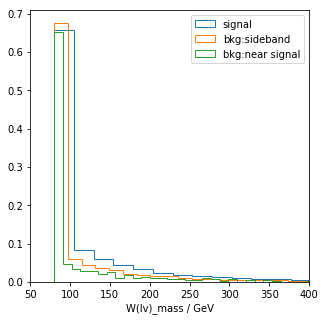

In [10]:
plot(w1,w1s,w1n,150,150,150,50,400,'W(lv)_mass / GeV')

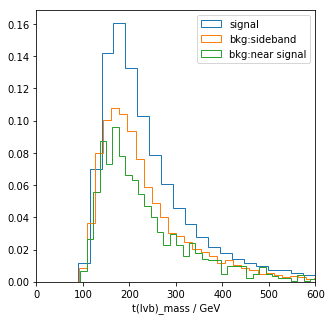

In [11]:
plot(t1,t1s,t1n,150,150,150,0,600,'t(lvb)_mass / GeV')

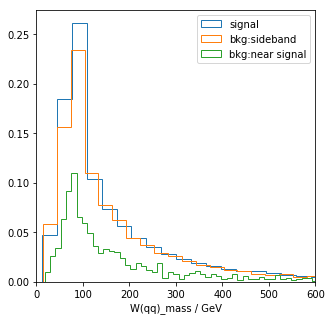

In [12]:
plot(w2,w2s,w2n,150,150,150,0,600,'W(qq)_mass / GeV')

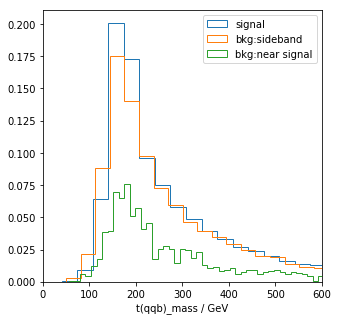

In [13]:
plot(t2,t2s,t2n,150,150,150,0,600,'t(qqb)_mass / GeV')

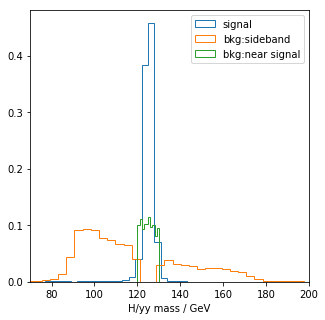

In [14]:
plot(h,hs,hn,500,150,10,70,200,'H/yy mass / GeV')

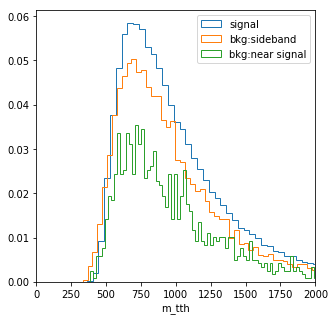

In [15]:
plot(tth,tths,tthn,150,150,150,0,2000,'m_tth')

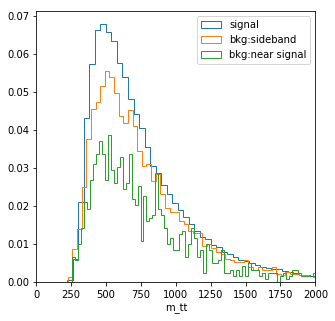

In [16]:
plot(tt,tts,ttn,150,150,150,0,2000,'m_tt')

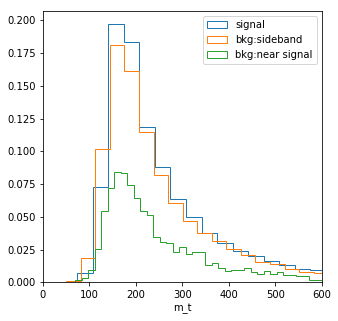

In [17]:
plot(t,ts,tn,150,150,150,0,600,'m_t')

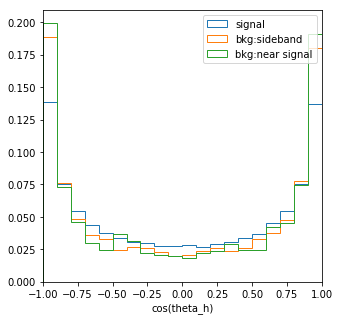

In [18]:
plot(thetah,thetahs,thetahn,20,20,20,-1,1,'cos(theta_h)')

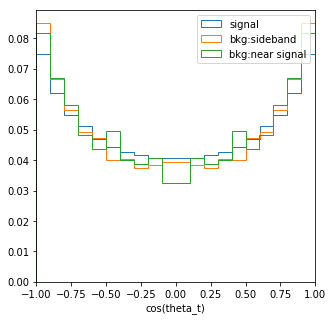

In [19]:
plot(thetat,thetats,thetatn,20,20,20,-1,1,'cos(theta_t)')

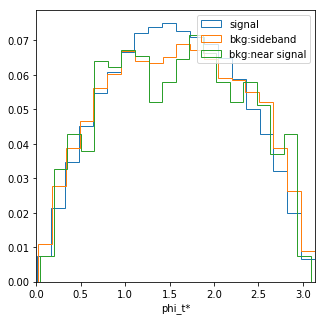

In [20]:
plot(phitstar,phitstars,phitstarn,20,20,20,0,3.14,'phi_t*')

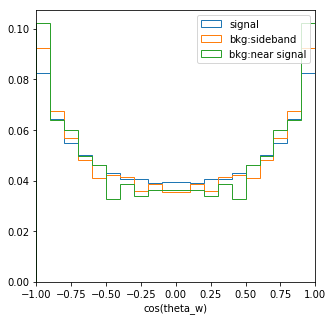

In [21]:
plot(thetaw,thetaws,thetawn,20,20,20,-1,1,'cos(theta_w)')

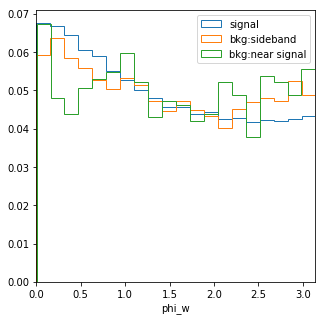

In [22]:
plot(phiw,phiws,phiwn,20,20,20,0,3.14,'phi_w')

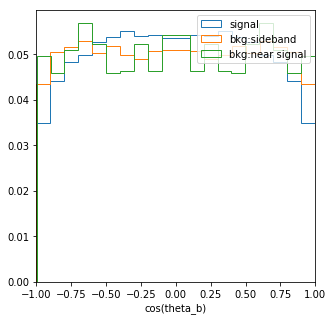

In [23]:
plot(thetab,thetabs,thetabn,20,20,20,-1,1,'cos(theta_b)')

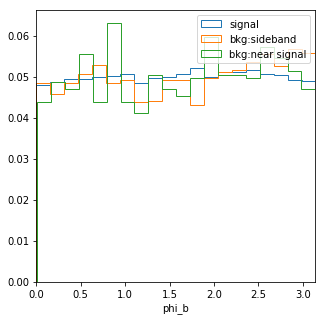

In [24]:
plot(phib,phibs,phibn,20,20,20,0,3.14,'phi_b')

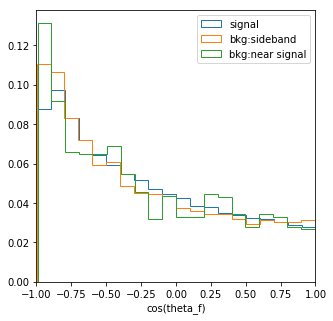

In [25]:
plot(thetaf,thetafs,thetafn,20,20,20,-1,1,'cos(theta_f)')

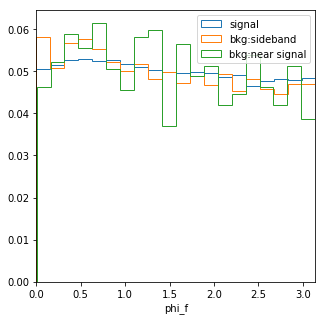

In [26]:
plot(phif,phifs,phifn,20,20,20,0,3.14,'phi_f')

In [30]:
def pp(data1, data2, data3, num1, num2, num3, xmin, xmax, xname):

  plt.hist(data1, density=True, bins=num1, histtype='step',label='signal')
  plt.hist(data2, density=True, bins=num2, histtype='step',label='bkg:sideband')
  plt.hist(data3, density=True, bins=num3, histtype='step',label='bkg:near signal')
  plt.xlim(xmin,xmax)
  plt.xlabel(xname,  fontsize=18)

In [31]:
def p(data1, data2, data3, num1, num2, num3, xmin, xmax, xname):

  weights1 = np.ones_like(data1) / len(data1)
  weights2 = np.ones_like(data2) / len(data2)
  weights3 = np.ones_like(data3) / len(data3)

  plt.hist(data1, weights=weights1, bins=num1, histtype='step',label='signal')
  plt.hist(data2, weights=weights2, bins=num2, histtype='step',label='bkg:sideband')
  plt.hist(data3, weights=weights3, bins=num3, histtype='step',label='bkg:near signal')
  plt.xlim(xmin,xmax)
  plt.xlabel(xname,  fontsize=18)

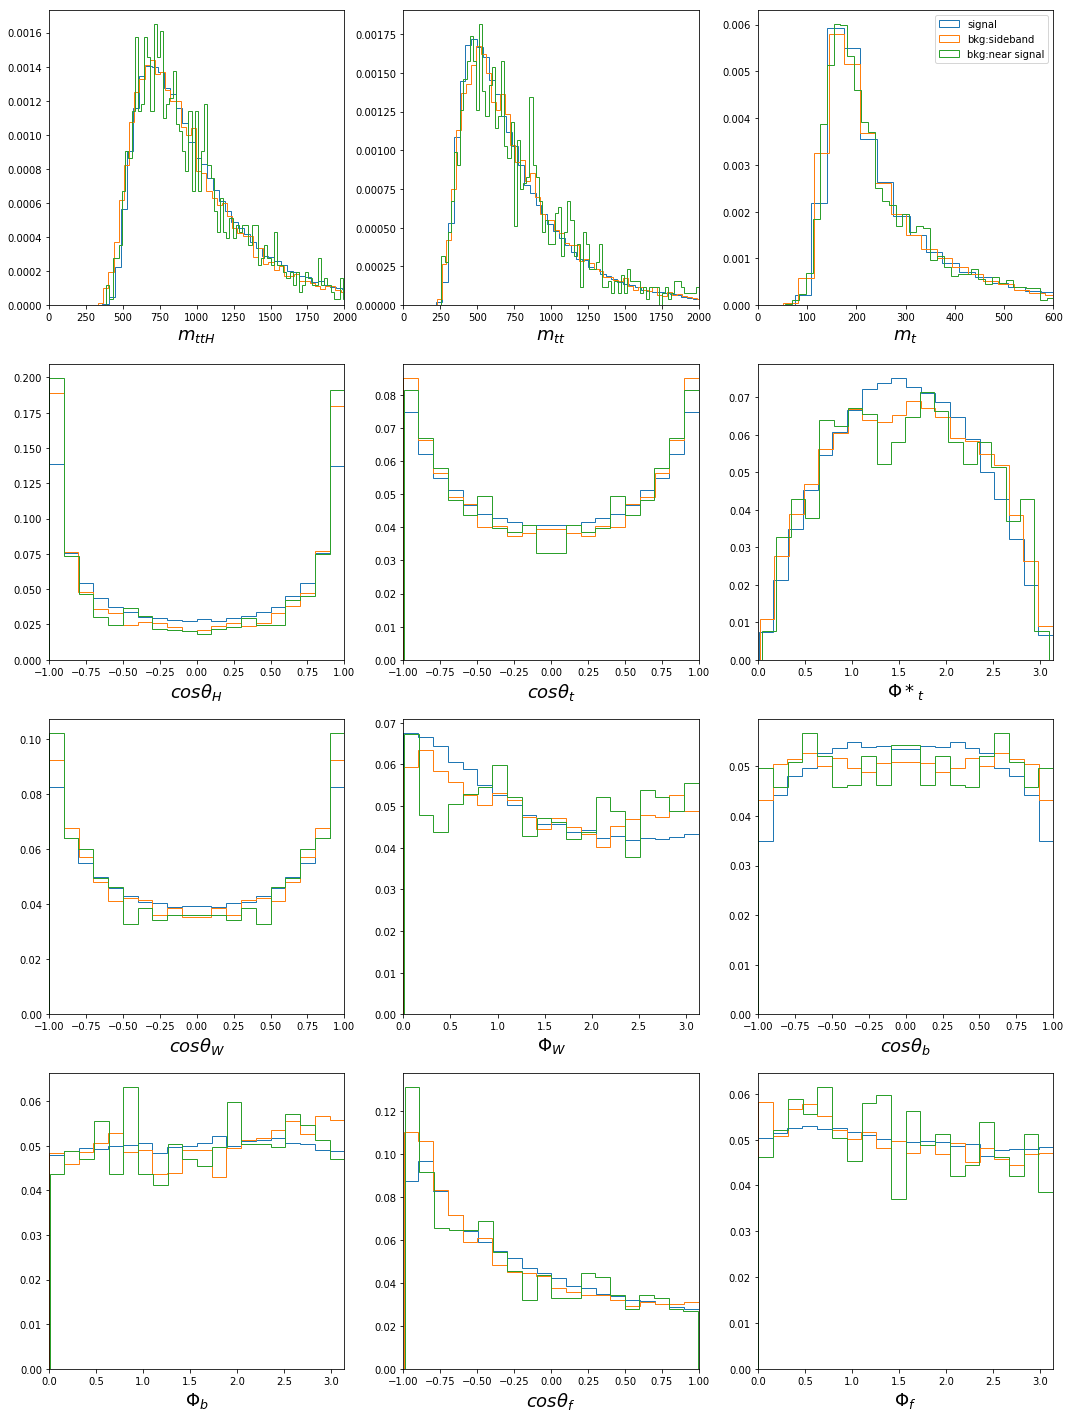

In [32]:
plt.figure(figsize=(18,25))

plt.subplot(4,3,1)
pp(tth,tths,tthn,150,150,150,0,2000,r'$m_{ttH}$')

plt.subplot(4,3,2)
pp(tt,tts,ttn,150,150,150,0,2000,r'$m_{tt}$')

plt.subplot(4,3,3)
pp(t,ts,tn,150,150,150,0,600,r'$m_{t}$')

plt.legend()

plt.subplot(4,3,4)
p(thetah,thetahs,thetahn,20,20,20,-1,1,r'$cos\theta_H$')

plt.subplot(4,3,5)
p(thetat,thetats,thetatn,20,20,20,-1,1,r'$cos\theta_t$')

plt.subplot(4,3,6)
p(phitstar,phitstars,phitstarn,20,20,20,0,3.14,r'$\Phi*_t$')

plt.subplot(4,3,7)
p(thetaw,thetaws,thetawn,20,20,20,-1,1,r'$cos\theta_W$')

plt.subplot(4,3,8)
p(phiw,phiws,phiwn,20,20,20,0,3.14,r'$\Phi_W$')

plt.subplot(4,3,9)
p(thetab,thetabs,thetabn,20,20,20,-1,1,r'$cos\theta_b$')

plt.subplot(4,3,10)
p(phib,phibs,phibn,20,20,20,0,3.14,r'$\Phi_b$')

plt.subplot(4,3,11)
p(thetaf,thetafs,thetafn,20,20,20,-1,1,r'$cos\theta_f$')

plt.subplot(4,3,12)
p(phif,phifs,phifn,20,20,20,0,3.14,r'$\Phi_f$')

plt.savefig('combine.pdf')
plt.show()
